<a href="https://colab.research.google.com/github/IsaiahejWashington/MLA_IEW/blob/main/MLA2_IEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.linear_model import LinearRegression, LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
column_rename = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor':'lag_current_pwr',
    'Leading_Current_Power_Factor':'lead_current_pwr',
    'NSM':'nsm',
    'WeekStatus':'week_status',
    'Day_of_week':'day_of_week',
    'Load_Type':'load_type'}




In [ ]:
df = df.rename(columns=column_rename)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Statistical and Visual Exploration

In [ ]:
numerical_summary = df.describe()
print(numerical_summary)

          usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh     CO2(tCO2)  \
count  35040.000000         35040.000000          35040.000000  35040.000000   
mean      27.386892            13.035384              3.870949      0.011524   
std       33.444380            16.306000              7.424463      0.016151   
min        0.000000             0.000000              0.000000      0.000000   
25%        3.200000             2.300000              0.000000      0.000000   
50%        4.570000             5.000000              0.000000      0.000000   
75%       51.237500            22.640000              2.090000      0.020000   
max      157.180000            96.910000             27.760000      0.070000   

       lag_current_pwr  lead_current_pwr           nsm  
count     35040.000000      35040.000000  35040.000000  
mean         80.578056         84.367870  42750.000000  
std          18.921322         30.456535  24940.534317  
min           0.000000          0.000000      0.000

In [ ]:
load_counts = df['load_type'].value_counts().reset_index()
load_counts.columns = ['load_type', 'count']
print(load_counts)

      load_type  count
0    Light_Load  18072
1   Medium_Load   9696
2  Maximum_Load   7272


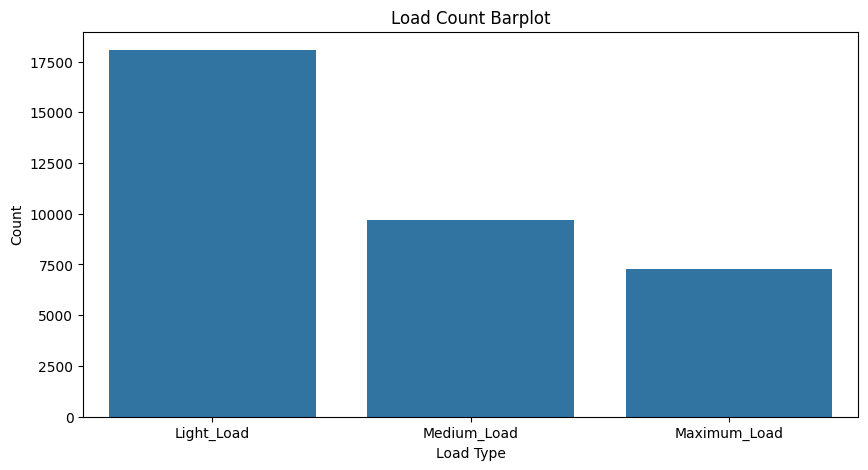

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='load_type', y='count', data=load_counts)
plt.title('Load Count Barplot')
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.show()

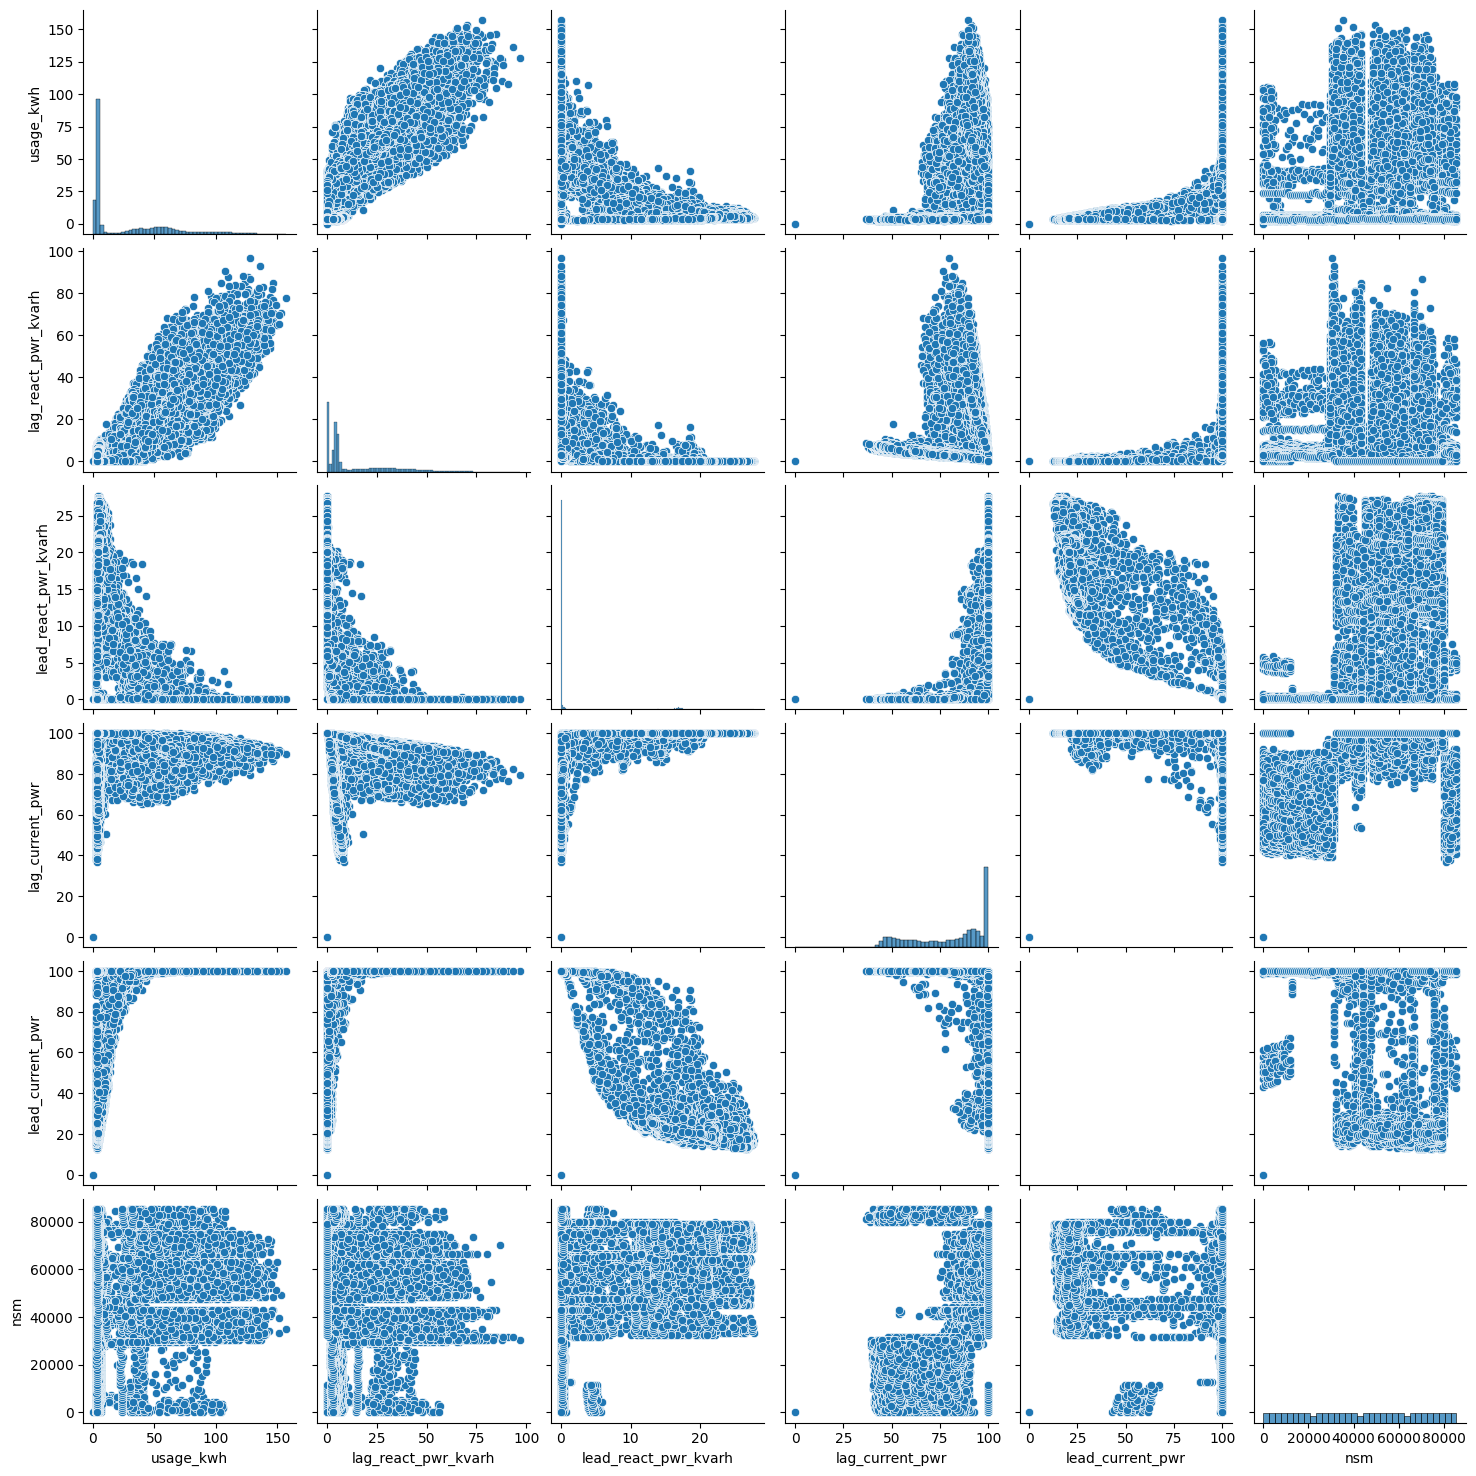

In [ ]:
numerical_cols = ['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']
sns.pairplot(df[numerical_cols])
plt.show()

If i am being completley candid. I am having a hard time discerning any pattens in this steel industry data. I am completely unsure how to answer the questions as I am not sure what each column refers to.

### Splitting Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (28032, 9)
X_test: (7008, 9)
y_train: (28032,)
y_test: (7008,)


### Building the Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
categorical_cols = ['week_status', 'day_of_week', 'load_type']
numerical_cols = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','lag_current_pwr','lead_current_pwr','nsm']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
test_score = pipeline.score(X_test, y_test)
print(f"Model R@ score on test set: {test_score:.4f}")

ValueError: A given column is not a column of the dataframe

### Executing the Model

r2 Score: 0.9157
MSE:  95.8709
RMSE: 9.7914
       Actual   Predicted
11356    2.88    3.643475
26543   60.77   83.781038
2445   120.42  107.444794
14649    3.13   -1.525001
32699   58.86   55.549927


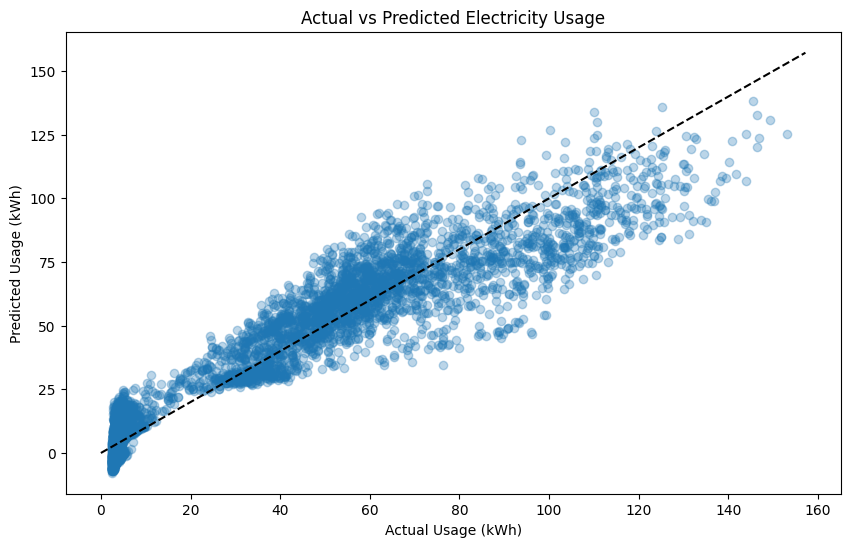

In [ ]:
print(f"r2 Score: {r2_score(y_test, y_pred):.4f}")
# print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") Not sure why this line does not work. Not sure how to properly define mean_absolute_error
print(f"MSE: {mean_squared_error(y_test, y_pred): .4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(5))

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicted Usage (kWh)')
plt.title('Actual vs Predicted Electricity Usage')
plt.show()


### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

y_train_pred = pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error (y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

test_r2 = r2_score(y_test, y_pred)
print(f"Test r2: {test_r2:.4f}")

print(f"Intercept (bias): {pipeline.named_steps['regressor'].intercept_:.4f}")

preprocessor.fit(X_train)
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor']
.named_transformers_['cat']
.get_feature_names_out(categorical_cols))

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': pipeline.named_steps['regressor'].coef_
})

print("Coefficients:")
print(coefficients)


Train RMSE: 9.5836
Test RMSE: 9.7914
Test r2: 0.9157
Intercept (bias): -64.1412
Coefficients:
                   Feature  Coefficient
0      lag_react_pwr_kvarh   140.088420
1     lead_react_pwr_kvarh     0.115149
2          lag_current_pwr    61.419782
3         lead_current_pwr    28.823084
4                      nsm     0.758749
5      week_status_Weekday    -0.482096
6      week_status_Weekend     0.482096
7       day_of_week_Friday    -0.327591
8       day_of_week_Monday    -0.195711
9     day_of_week_Saturday    -0.213877
10      day_of_week_Sunday     0.695973
11    day_of_week_Thursday    -0.347249
12     day_of_week_Tuesday     0.203788
13   day_of_week_Wednesday     0.184667
14    load_type_Light_Load    -4.944833
15  load_type_Maximum_Load     1.939756
16   load_type_Medium_Load     3.005077


### Conclusion
Write a general conclusion about the results of your model.

This model provides both actual and preditive results of kWh usage. It can break that usage down into days of the week. The highest and lowest possible usage as well. A steel factory could use these models to best detemine how to use their power to its best effects.

## Problem 2

### Reading the Data

In [ ]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)
df.outcome.groupby(df.outcome).count()

### Splitting Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['date', 'week_status', 'day_of_week', 'load_type'])
y= df['load_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("X_train")
print(X_train.head())
print(' ')
print("y_train")
print(y_train.head())



X_train shape: (28032, 7)
X_test shape: (7008, 7)
y_train shape: (28032,)
y_test shape: (7008,)
X_train
       usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  CO2(tCO2)  \
30531       3.60                 5.87                  0.00       0.00   
32802      34.63                 5.22                  2.20       0.02   
18562      46.91                47.84                  0.00       0.02   
8703        3.10                 0.00                 16.88       0.00   
33072       7.96                 0.32                 19.40       0.00   

       lag_current_pwr  lead_current_pwr    nsm  
30531            52.28            100.00   3600  
32802            98.88             99.80  60300  
18562            70.01            100.00  31500  
8703            100.00             18.06  57600  
33072            99.92             37.96  44100  
 
y_train
30531     Light_Load
32802    Medium_Load
18562     Light_Load
8703      Light_Load
33072    Medium_Load
Name: load_type, dtype: object


I had to switch the y from week_status to load_type. I could not figure out how to get to build the pipeline from week_status. Everything I tried either ended up with NaN values or all zeros.

### Building the Pipeline

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        random_state=32
    ))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

On moodle the instruction is to fit to a linear regression, I figure that is meant to be Logistic regression so my following code will reflect that


### Executing the Model

In [ ]:
print(f"Training: {pipeline.score(X_test, y_test):.4f}")
print(f"Test: {pipeline.score(X_test, y_test):.4f}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual and predicted")
print(results.head(5))




Training: 0.7433
Test: 0.7433
Actual and predicted
             Actual     Predicted
4172   Maximum_Load  Maximum_Load
18749    Light_Load    Light_Load
782      Light_Load    Light_Load
23432    Light_Load    Light_Load
11125   Medium_Load   Medium_Load


### Evaluating Model

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

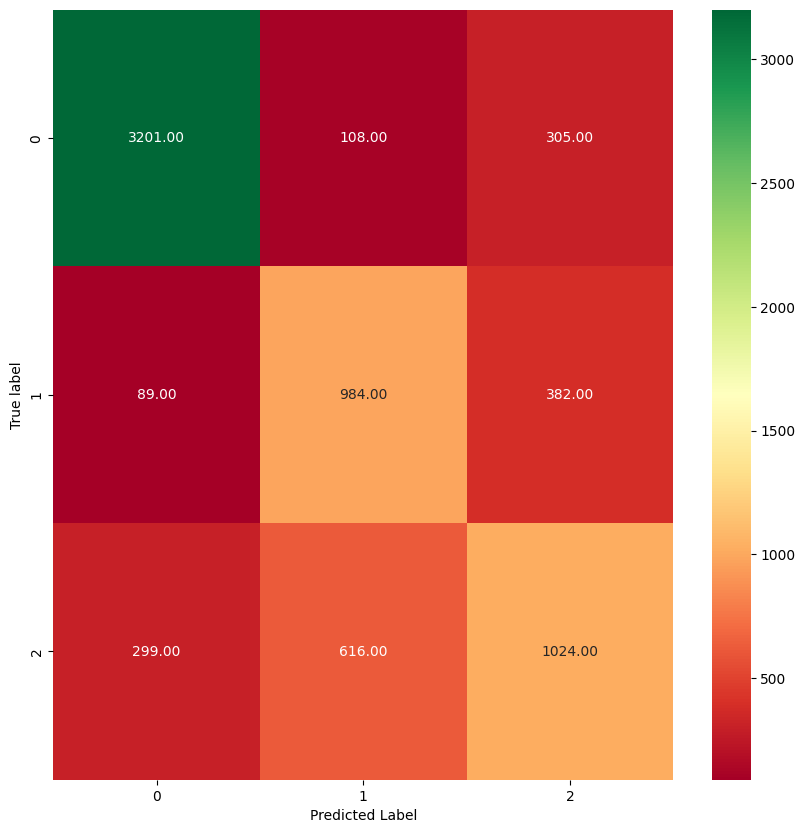

In [ ]:
plot_cm(y_test, y_pred)


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

Precision: 0.7451
Recall: 0.7433
F1 Score: 0.7428



### Conclusion
Write a general conclusion about the results of your model.

I think I strugged with the second half of this assignment. I could not figure out how to properly analyze week_status. However I do think this is useful model in anazlying the load_type and accuratly predicting what the load type will be.